In [3]:
import pandas as pd
import zipfile39 #always import (pull) zip file first 
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

#### dataframe stuff from class
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
print(df)
df.head(10)
df.info() #information on dataframe (the csv file)
list(df.columns)

#### Clean and reajust the dataset (from class)
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True) #to filter data using integer based indexes wherease loc uses strings/labels

#Making dataframe with top 4 catchment counts and annual temperature
#get catchment count from df

catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count)


# Get the top four sites with the highest count
top_four_sites = catchment_count.nlargest(4, 'count').index.tolist()

print(top_four_sites)

# Create an empty list for each site to store temperatures for each site seperately
site1_temps = []
site2_temps = []
site3_temps = []
site4_temps = []

# Filter the Df for each site and extract temps
for site in top_four_sites:
    temps_site = df[df['Catchment_name'] == site]['temp_ann'].tolist()
    if site == 'Ebro':
        site1_temps = temps_site
    elif site == 'Galiza-Norte':
        site2_temps = temps_site
    elif site == 'Minho':
        site3_temps = temps_site
    elif site == 'Tejo':
        site4_temps = temps_site

# Print the lists of temperatures for each site
print("Temperatures for site Ebro:", site1_temps)
print("Temperatures for site Galiza-Norte:", site2_temps)
print("Temperatures for site Minho:", site3_temps)
print("Temperatures for site Tejo:", site4_temps)




       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

Strip Plot


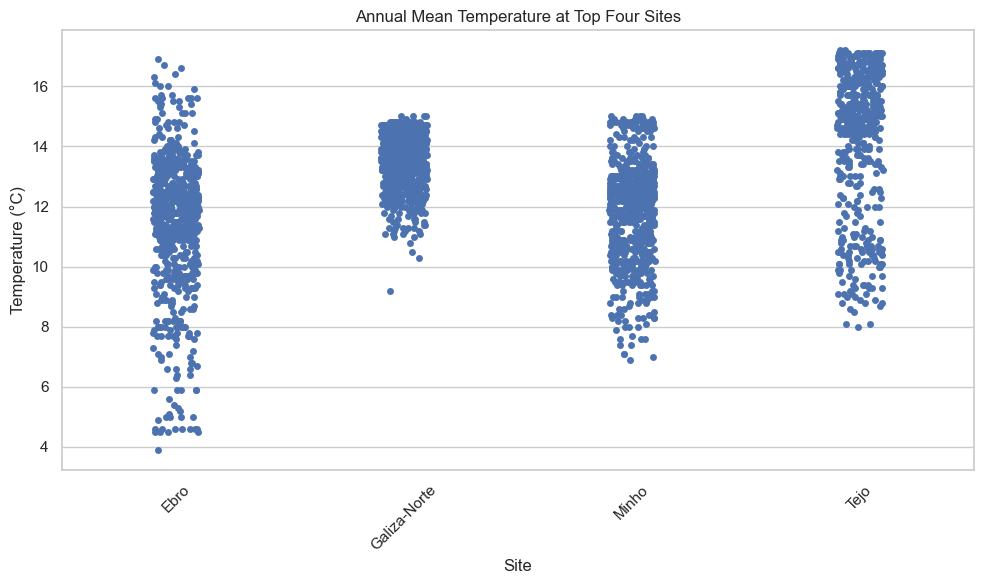

Boxplot


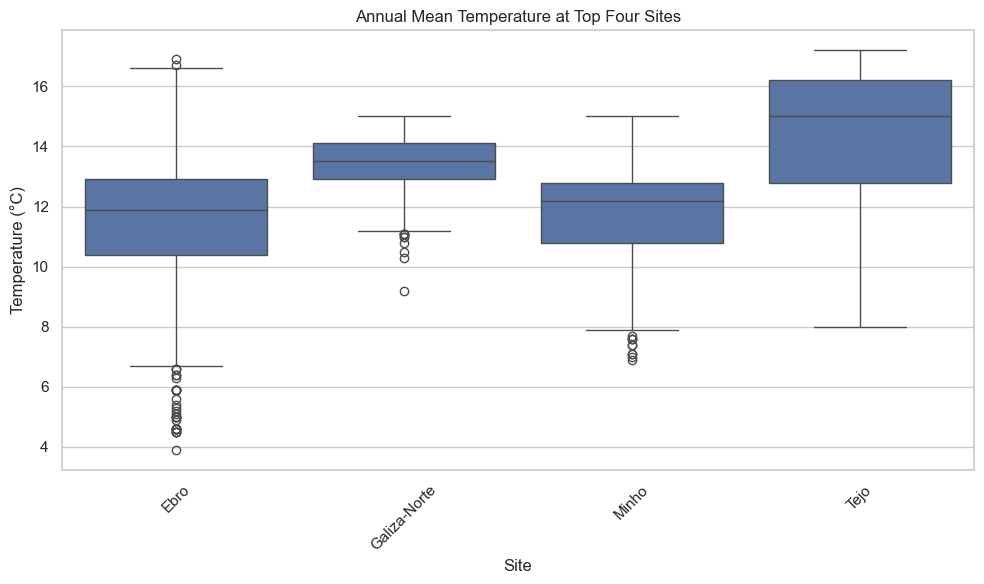

Histogram


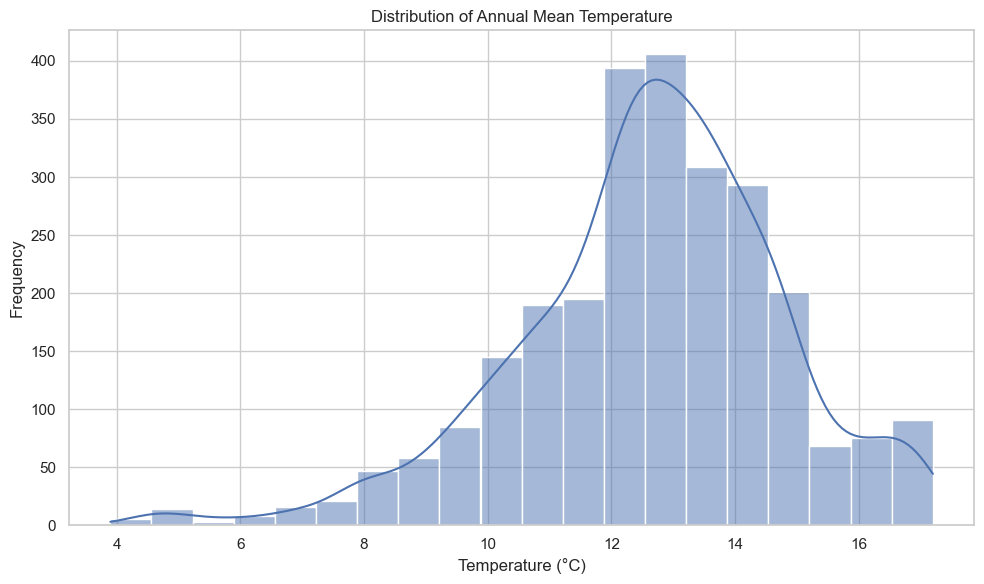

In [6]:
#Make Graphs

# Create an empty list for each site to store its temperature seperately
site_temps = [] 

# Filter the DataFrame for each site and append to site_temps
for site in top_four_sites:
    temps_site = df[df['Catchment_name'] == site]['temp_ann'].tolist()
    # Remove NaN values
    temps_site = [temp for temp in temps_site if not np.isnan(temp)] #creating a list of temperatures specific to each site
    site_temps.append(temps_site) 

# Create a new DataFrame with all temperatures and corresponding sites
data = {'Catchment_name': sum([[site]*len(temps) for site, temps in zip(top_four_sites, site_temps)], []),
        'temp_ann': sum(site_temps, [])}
df_combined = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Create the strip plot
print("Strip Plot")
plt.figure(figsize=(10, 6))
sns.stripplot(x='Catchment_name', y='temp_ann', data=df_combined, jitter=True)
plt.title('Annual Mean Temperature at Top Four Sites')
plt.xlabel('Site')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Create a boxplot
print("Boxplot")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Catchment_name', y='temp_ann', data=df_combined)
plt.title('Annual Mean Temperature at Top Four Sites')
plt.xlabel('Site')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create the histogram
print("Histogram")
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='temp_ann', bins=20, kde=True)
plt.title('Distribution of Annual Mean Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


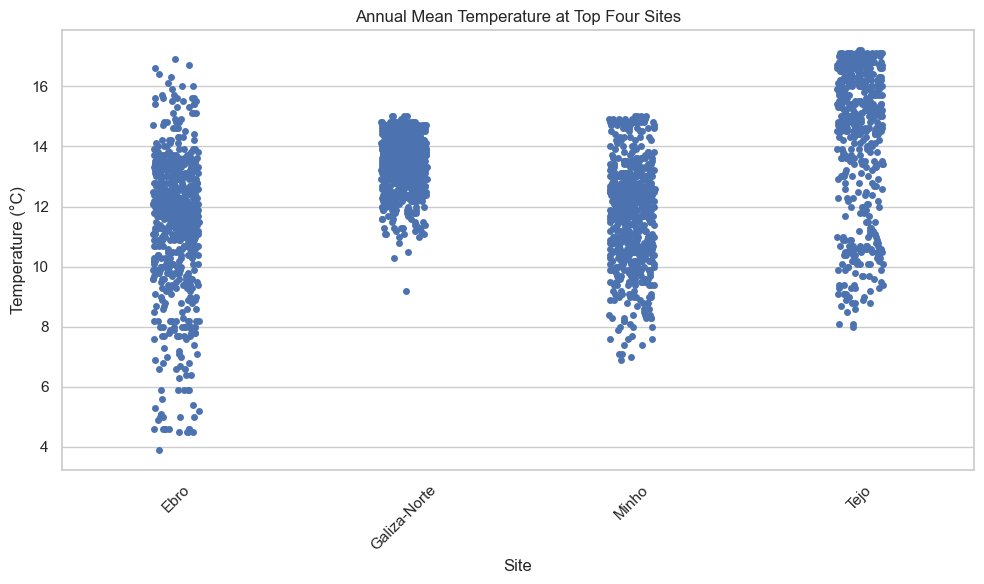

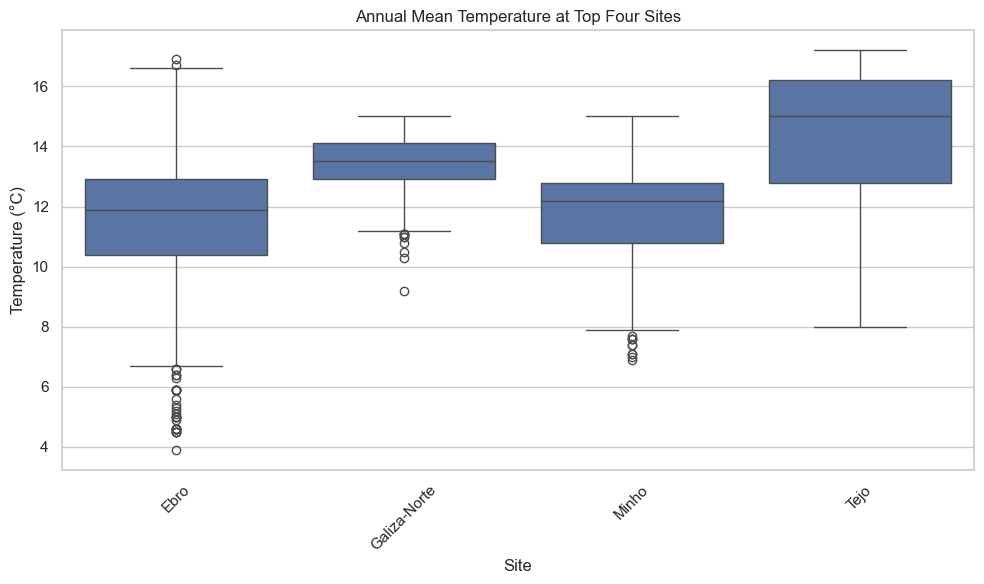

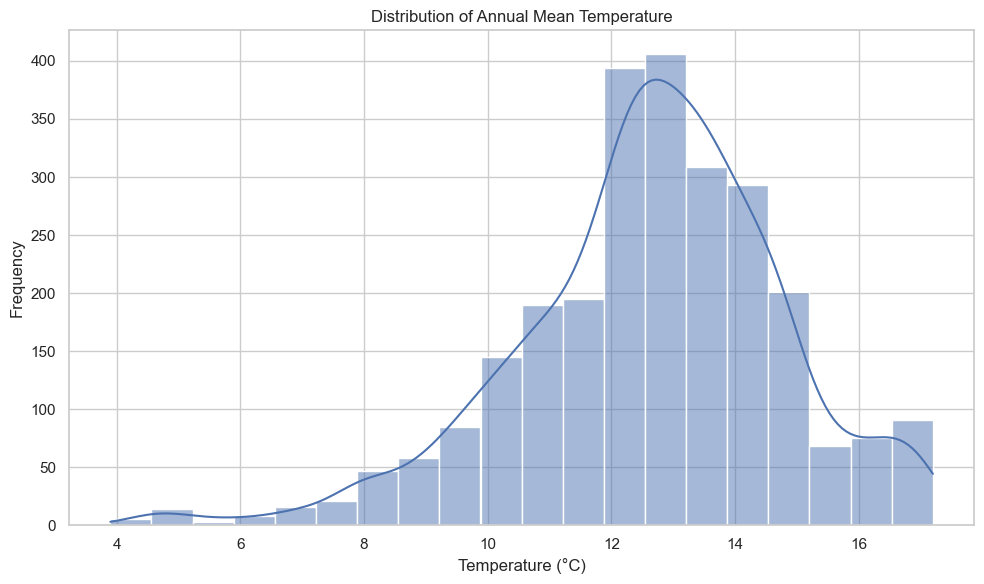

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your temperature data
# Assuming df has columns 'Catchment_name' and 'temp_ann'

# Create an empty list to store temperatures for each site separately
site_temps = [] 

# Filter the DataFrame for each site and append to site_temps
We filter the DataFrame for each site and append the temperatures to site_temps.
for site in top_four_sites:
    temps_site = df[df['Catchment_name'] == site]['temp_ann'].tolist()
    # Remove NaN values
    temps_site = [temp for temp in temps_site if not np.isnan(temp)] #creating a list of temperatures specific to each site
    site_temps.append(temps_site) 

# Create a new DataFrame that combines  all temperatures and corresponding sites
    
data = {'Catchment_name': sum([[site]*len(temps) for site, temps in zip(top_four_sites, site_temps)], []),
        'temp_ann': sum(site_temps, [])}
df_combined = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Catchment_name', y='temp_ann', data=df_combined, jitter=True)
plt.title('Annual Mean Temperature at Top Four Sites')
plt.xlabel('Site')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Catchment_name', y='temp_ann', data=df_combined)
plt.title('Annual Mean Temperature at Top Four Sites')
plt.xlabel('Site')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create the histogram (doesn't display categorical data on x-axis)
#histogram summarizes the distribution of temp across all sites, rather than displaying each site individually.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='temp_ann', bins=20, kde=True)
plt.title('Distribution of Annual Mean Temperature Histogram')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
